# FYP Analysis - Chatbot Personality and User Engagement

In [1]:
import json
from pandas.io.json import json_normalize
import os
import logging
import logging.handlers
import pandas as pd
import numpy as np
import glob
from datetime import datetime,timedelta
from collections import Counter
import nltk 
from functools import reduce
import re
import itertools
from scipy.stats import pointbiserialr
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# Unpickle Anonymised Data

### Demographic Dataframe
This data was collected from the Pre-Interaction survey taken by the participants.
The data has been anonymised, and stored in a dataframe with the following columns:

- Timestamp (The time they began taking the survey)
- Age 
- Gender
- Do you know what a chatbot is? 
- If Yes, describe your understanding of what a chatbot is
- How often do you use Siri, Alexa, Google Assistant or any other virtual assistant?
- Their answers to a range of personality questions 



In [2]:
#unpickle df_dem
df_dem = pd.read_pickle("./df_dem.pkl")

### Interaction DataFrames

This code parses the json files from the chatbot interactions and stores the data in a dataframe with the following columns:

- Duration (Lenght of conversation in minutes)
- Chatbot (Name of chatbot)
- NumberOfTurns (absolute count of conversation turns made by the participant)
- Utterance (A list of all the participant's utterances)
- Word Count (Total word count of all the participant's utterances (sum))
- Average Utterance Length (The average character length of the participant's utteranes (mean))




In [3]:
#unpickle df_chatbotdata
df_chatbotdata = pd.read_pickle("./df_chatbotdata.pkl")
# convert duratin to minutes from ns
df_chatbotdata = df_chatbotdata.astype({'Duration': 'timedelta64[m]'})

### Complete Data

This data comprises of all four surveys taken by the particpants and the data collected from their interactions with the chatbots

In [4]:
#unpickle df_merged
df_merged = pd.read_pickle("./df_merged.pkl")
# Convert 
df_merged = df_merged.astype({'Duration_x': 'timedelta64[m]'})
df_merged = df_merged.astype({'Duration_y': 'timedelta64[m]'})

# Demographic Visualisations

### Bar Chart to depict the Age Distribution of the participants

In [5]:
# Age
fig = px.histogram(df_dem, x="Age")
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Age Distribution of Participants",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
   
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()

### Bar Chart to depict the Gender Distribution of the participants

In [6]:
fig = px.histogram(df_dem, x="Gender")
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Gender distribution of Participants",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
   
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()

### Bar Chart to depict how often the partipants use a chatbot

In [7]:
fig = px.histogram(df_dem, x='How often do you use Siri, Alexa, Google Assistant or any other virtual assistant?')
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Frequency distribution of chatbot usage",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
       xaxis_title = "Frequency of chatbot use",
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()

### Pie Chart to depict if the particpants knew what a chatbot was

In [8]:
labels = df_dem['Do you know what a chatbot is?'].value_counts().index
values = df_dem['Do you know what a chatbot is?'].value_counts().values

fig = px.pie(labels=labels, values=values, names=labels)
fig.update_layout(
    width=600,
    height=650,
    title={
        'text': "Do you know what a chatbot is?",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()

## Personality Assignment

Automation of the Big Five Inventory Scoring Key: (https://fetzer.org/sites/default/files/images/stories/pdf/selfmeasures/Personality-BigFiveInventory.pdf)

In [9]:
df_dem["extraversion_score"] = ""
df_merged["extraversion_score"] = ""
df_dem["agreeableness_score"] = ""
df_merged["agreeableness_score"] = ""

for index, row in df_dem.iterrows():
    df_dem["extraversion_score"][index] = np.mean((6 - df_dem['I am reserved'][index] , df_dem['I am full of energy'][index], df_dem['I generate a lot of enthusiasm '][index] ,6 - df_dem['I tend to be quiet '][index], df_dem['I have an assertive personality'][index] , 6 - df_dem['I am sometimes shy, inhibited'][index], df_dem['I am outgoing, sociable '][index]))
    df_dem["agreeableness_score"][index] = np.mean((6 - df_dem['I tend to find fault with others'][index], df_dem['I am helpful and unselfish with others'][index], 6 - df_dem['I start quarrels with others'][index] , df_dem['I have a forgiving nature'][index] ,df_dem['I am generally trusting'][index] , 6 - df_dem['I can be cold and aloof '][index], df_dem['I am considerate and kind to almost everyone'][index],  6 - df_dem['I am sometimes rude to others'][index], df_dem['I like to cooperate with others'][index]))

df_merged["extraversion_score"] = df_dem["extraversion_score"]
df_merged["agreeableness_score"] = df_dem["agreeableness_score"]


/Users/sineadfarrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sineadfarrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Personality of Particpants (Extraversion)

In [10]:
counts, bins = np.histogram(df_dem['extraversion_score'], bins=range(0, 7))
bins = 0.5 * (bins[:-1] + bins[1:])
fig = px.bar(x=bins, y=counts, labels={'x':'Extraversion Score', 'y':'count'})
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Distribution of Participant's Extraversion Scores",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()


### Mean and Standard Deviation of Personality Score (Extraversion)

In [11]:
 np.mean(df_dem['extraversion_score'])

3.058823529411765

In [12]:
np.std(df_dem['extraversion_score'])

0.6276135243642973

### Personality of Particpants (Agreeableness)

In [13]:
# Personality of Participants 
counts, bins = np.histogram(df_dem['agreeableness_score'], bins=range(0, 7))
bins = 0.5 * (bins[:-1] + bins[1:])
fig = px.bar(x=bins, y=counts, labels={'x':'Agreeableness Score', 'y':'count'})
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Distribution of Participant's Agreeableness Scores",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=22,
        color="#000000"
    ),
)
fig.show()

### Mean and Standard Deviation of Personality Score(Agreeableness)

In [14]:
np.mean(df_dem['agreeableness_score'])

3.973856209150327

In [15]:
np.std(df_dem['agreeableness_score'])

0.43206519950427213

## Box Plot of Interaction Duration

In [16]:
fig = px.box(df_chatbotdata , "Chatbot", "Duration", "Chatbot", color_discrete_sequence=["orange", "green"])
fig.update_traces(quartilemethod="exclusive", width=0.5) # or "inclusive", or "linear" by default
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Duration of Interaction in Minutes",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Duration (Minutes)",
    #legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)

fig.show()


### Variance in Duration for each Chatbot    

In [17]:
# Variance 
print("Nasoto Variance: " + str(df_merged.loc[:,"Duration_x"].var()))
print("Makoto Variance: " + str(df_merged.loc[:,"Duration_y"].var()))

Nasoto Variance: 18.36764705882353
Makoto Variance: 3.2794117647058822


## BoxPlot Number of Conversation Turns

In [18]:
fig = px.box(df_chatbotdata  , "Chatbot", "NumberOfTurns", "Chatbot", color_discrete_sequence=["orange", "green"])
fig.update_traces(quartilemethod="exclusive", width=0.5) # or "inclusive", or "linear" by default
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Number of Conversation Turns",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Total Number of Turns",
    #legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()

### Mean of Conversation Turns for each chatbot

In [19]:
print("Nasoto: " + str(np.mean(df_merged['NumberOfTurns_x'])))
print("Makoto: " + str(np.mean(df_merged['NumberOfTurns_y'])))

Nasoto: 20.294117647058822
Makoto: 15.588235294117647


## BoxPlot Word Count

In [20]:
fig = px.box(df_chatbotdata  , "Chatbot", "Word_Count", "Chatbot", color_discrete_sequence=["orange", "green"])
fig.update_traces(quartilemethod="exclusive", width=0.5) # or "inclusive", or "linear" by default
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Total User Word Count",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Total Number of Words",
    #legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()

# Average Utterance Length

In [21]:
fig = px.box(df_chatbotdata  , "Chatbot", "Avg_Utt_Len", "Chatbot", color_discrete_sequence=["orange", "green"])
fig.update_traces(quartilemethod="exclusive", width=0.5) # or "inclusive", or "linear" by default
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Average Utterance Length (characters)",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Number of Characters",
    #legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()

# Preferred Chatbot

In [22]:
labels = df_merged['Which chatbot did you prefer interacting with?'].value_counts().index
values = df_merged['Which chatbot did you prefer interacting with?'].value_counts().values

fig = px.pie(labels=labels, values=values, names=labels, color_discrete_sequence=["green", "orange"])
fig.update_layout(
    width=600,
    height=650,
    title={
        'text': "Preferred Chatbot by Participants",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
   
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()

# Is the preferred chatbot experience positively correlated with conversation engagement metrics ?

#### Enagment Metrics include:
- Duration (minutes)
- Conversation length(number of turns)
- Word Count 
- Average Utterance length

### Correlation between Chatbot Preference and Duration (minutes)

In [23]:
durationNasoto = df_merged['Duration_x']
durationMakoto = df_merged['Duration_y'] 
chatbot = df_merged['Chatbot_binary']

pbc_RateNasoto = pointbiserialr(chatbot, durationNasoto)
pbc_RateMakoto = pointbiserialr(chatbot, durationMakoto)

print(pbc_RateNasoto)
print(pbc_RateMakoto)


PointbiserialrResult(correlation=0.06940595855544199, pvalue=0.7912487410873233)
PointbiserialrResult(correlation=0.15561248869152916, pvalue=0.5509164374540585)


### Correlation between Chatbot Preference and the Conversation length (number of turns)

In [24]:
numTurnsNasoto = df_merged['NumberOfTurns_x']
numTurnsMakoto = df_merged['NumberOfTurns_y'] 
chatbot = df_merged['Chatbot_binary']

pbc_RateNasoto = pointbiserialr(chatbot, numTurnsNasoto)
pbc_RateMakoto = pointbiserialr(chatbot, numTurnsMakoto)

print(pbc_RateNasoto)
print(pbc_RateMakoto)



PointbiserialrResult(correlation=-0.20554047538140596, pvalue=0.4286993015297625)
PointbiserialrResult(correlation=0.195363742871168, pvalue=0.4523900092475758)


### Correlation between Chatbot Preference and Word Count

In [25]:
wordCountNasoto = df_merged['Word_Count_x']
wordCountMakoto = df_merged['Word_Count_y'] 
chatbot = df_merged['Chatbot_binary']

pbc_RateNasoto = pointbiserialr(chatbot, wordCountNasoto)
pbc_RateMakoto = pointbiserialr(chatbot, wordCountMakoto)

print(pbc_RateNasoto)
print(pbc_RateMakoto)




PointbiserialrResult(correlation=-0.1587189008812192, pvalue=0.5428921664494841)
PointbiserialrResult(correlation=-0.06239932586418605, pvalue=0.8119484399379424)


### Correlation between Chatbot Preference and Average Utterance Length

In [26]:
avgUttNasoto = df_merged['Avg_Utt_Len_x']
avgUttMakoto = df_merged['Avg_Utt_Len_y'] 
chatbot = df_merged['Chatbot_binary']

pbc_RateNasoto = pointbiserialr(chatbot, avgUttNasoto)
pbc_RateMakoto = pointbiserialr(chatbot, avgUttMakoto)

print(pbc_RateNasoto)
print(pbc_RateMakoto)



PointbiserialrResult(correlation=-0.1033710414508296, pvalue=0.6929861170959422)
PointbiserialrResult(correlation=-0.12795529369832204, pvalue=0.6245528230730844)


# Is the preferred chatbot correlated with the rating scored by the particpants?

Partipants rated each chatbot using a Likert scale (1 -5) on each of the three categorie mentioned below.
#### The Ratings include: 
- Knowledge
- Attitude/Personality
- Quality of Conversation



### Create DataFrame containg the ratings for each chatbot 

In [27]:
df_nas = pd.DataFrame(columns = ['Chatbot', 'Knowledge', 'QualityOfConvo', "Attitude"]) 
df_nas['Chatbot'] = df_merged['Chatbot_x']
df_nas['Knowledge'] = df_merged['How would you rate your interaction/experience with Nasoto based on its knowledge?']
df_nas['QualityOfConvo'] = df_merged["How would you rate your experience/interaction with the Nasoto based on the quality of the conversation?"]
df_nas['Attitude'] = df_merged["How would you rate your experience/interaction with Nasoto based on the it's attitude/personality?"]

In [28]:
df_rates = pd.DataFrame(columns = ['Chatbot', 'Knowledge', 'QualityOfConvo', "Attitude"]) 
df_rates['Chatbot'] = df_merged['Chatbot_y']
df_rates['Knowledge'] = df_merged['How would you rate your experience with Makoto based on its knowledge?']
df_rates['QualityOfConvo'] = df_merged["How would you rate your experience with Makoto based on the quality of the conversation?"]
df_rates['Attitude'] = df_merged["How would you rate your experience with Makoto based on the its attitude/personality?"]
df_rates = df_nas.append(df_rates)

## Ratings Based on Chatbot's Knowledge

In [29]:
fig = px.box(df_rates , "Chatbot", "Knowledge", "Chatbot", color_discrete_sequence=["orange", "green"])
fig.update_traces(quartilemethod="exclusive", width=0.5) # or "inclusive", or "linear" by default
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Ratings based on Chatbot's Knowledge",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Rating",
    #legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
    
)

fig.show()

### Mean of Rating based on Knowledge

In [30]:
print("Nasoto: " + str(np.mean(df_merged['How would you rate your interaction/experience with Nasoto based on its knowledge?'])))
print("Makoto: " + str(np.mean(df_merged['How would you rate your experience with Makoto based on its knowledge?'])))

Nasoto: 3.6470588235294117
Makoto: 3.588235294117647


### Variance in Rating based on Knowledge

In [31]:
print("Nasoto: " + str(np.var(df_merged['How would you rate your interaction/experience with Nasoto based on its knowledge?'])))
print("Makoto: " + str(np.var(df_merged['How would you rate your experience with Makoto based on its knowledge?'])))

Nasoto: 1.0519031141868513
Makoto: 1.5363321799307956


### Correlation between Chatbot Prefference and Knowledge rating

In [32]:
# rating for Knowledge
knowledgeRateNasoto = df_merged['How would you rate your interaction/experience with Nasoto based on its knowledge?']
knowledgeRateMakoto = df_merged['How would you rate your experience with Makoto based on its knowledge?'] 
chatbot = df_merged['Chatbot_binary']

pbc_RateNasoto = pointbiserialr(chatbot, knowledgeRateNasoto)
pbc_RateMakoto = pointbiserialr(chatbot, knowledgeRateMakoto)

print('Nasoto: ' + str(pbc_RateNasoto))
print('Makoto: ' + str(pbc_RateMakoto))



Nasoto: PointbiserialrResult(correlation=0.34800496568346667, pvalue=0.17105812247202284)
Makoto: PointbiserialrResult(correlation=-0.5146502354656655, pvalue=0.03453057958723658)


## Ratings Based on Chatbot's Attitude/Personality

In [33]:
fig = px.box(df_rates , "Chatbot", "Attitude", "Chatbot", color_discrete_sequence=["orange", "green"])
fig.update_traces(quartilemethod="exclusive", width=0.5) # or "inclusive", or "linear" by default
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Ratings based on Chatbot's Attitude/Personality",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Ratings",
    #legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()


### Variance in Rating based on Personality/Attitude

In [34]:
# variance 
print("Nasoto: " + str(np.var(df_merged["How would you rate your experience/interaction with Nasoto based on the it's attitude/personality?"])))
print("Makoto: " + str(np.var(df_merged["How would you rate your experience with Makoto based on the its attitude/personality?"]  )))

Nasoto: 1.7093425605536332
Makoto: 0.9480968858131488


### Correlation between Chatbot Prefference and Personality/Attitude rating

In [35]:
# rating for Personality 
personalityRateNasoto = df_merged["How would you rate your experience/interaction with Nasoto based on the it's attitude/personality?"]
personalityRateMakoto = df_merged["How would you rate your experience with Makoto based on the its attitude/personality?"] 
chatbot = df_merged['Chatbot_binary']

pbc_RateNasoto = pointbiserialr(chatbot, personalityRateNasoto)
pbc_RateMakoto = pointbiserialr(chatbot, personalityRateMakoto)

print(pbc_RateNasoto)
print(pbc_RateMakoto)



PointbiserialrResult(correlation=0.3775498108185499, pvalue=0.13516206739920897)
PointbiserialrResult(correlation=-0.5381436055050598, pvalue=0.02585480550580951)


## Ratings Based on Chatbot's Quality of Conversation

In [36]:

fig = px.box(df_rates , "Chatbot", "QualityOfConvo", "Chatbot", color_discrete_sequence=["orange", "green"])
fig.update_traces(quartilemethod="exclusive", width=0.5) # or "inclusive", or "linear" by default
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Ratings based on the Quality of the Conversation",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Ratings",
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()

### Variance in Rating based on Quality of Conversation

In [37]:
# variance 
print("Nasoto: " + str(np.var(df_merged["How would you rate your experience/interaction with the Nasoto based on the quality of the conversation?"])))
print("Makoto: " + str(np.var(df_merged["How would you rate your experience with Makoto based on the quality of the conversation?"] )))

Nasoto: 1.42560553633218
Makoto: 1.2664359861591694


### Mean of Rating based on Quality of Conversation

In [38]:
# mean
print("Nasoto: " + str(np.mean(df_merged["How would you rate your experience/interaction with the Nasoto based on the quality of the conversation?"])))
print("Makoto: " + str(np.mean(df_merged["How would you rate your experience with Makoto based on the quality of the conversation?"] )))

Nasoto: 3.4705882352941178
Makoto: 3.7058823529411766


### Correlation between Chatbot Prefference and Quality of Conversation


In [39]:
#Rating Quality of Conversation 
qualityRateNasoto = df_merged["How would you rate your experience/interaction with the Nasoto based on the quality of the conversation?"]
qualityRateMakoto = df_merged["How would you rate your experience with Makoto based on the quality of the conversation?"] 
chatbot = df_merged['Chatbot_binary']

pbc_RateNasoto = pointbiserialr(chatbot, qualityRateNasoto)
pbc_RateMakoto = pointbiserialr(chatbot, qualityRateMakoto)

print(pbc_RateNasoto)
print(pbc_RateMakoto)



PointbiserialrResult(correlation=0.5024615781733496, pvalue=0.03982810822116958)
PointbiserialrResult(correlation=-0.2901698516474449, pvalue=0.2585628946532981)


# User Personality 

User personality was captured in the demographic survey. Partipants scores for extraversion and agreebleness were calculated earlier in the project. 

In [40]:
df_personality = pd.DataFrame()

df_personality['extraversion_score'] = df_merged['extraversion_score']
df_personality['agreeableness_score']= df_merged['agreeableness_score']
df_personality['preffered_Chatbot'] = df_merged['Which chatbot did you prefer interacting with?']

### Chatbot's names converted to either 0 or 1 for calculation 
Makoto = 0 

Nasoto = 1

In [41]:
df_personality['Chatbot_binary'] = pd.np.where(df_personality.preffered_Chatbot.str.contains("Makoto"), 0, 1)

/Users/sineadfarrell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



# Point Biserial Correlation between preffered chatbot and persoanlity scores

In [42]:
chatbot = df_personality['Chatbot_binary']
extraversion_score = df_personality['extraversion_score']
agreeableness_score = df_personality['agreeableness_score']

#pbc of extraversion scores
pbc_extraversion = pointbiserialr(chatbot, extraversion_score)
pbc_agreeableness = pointbiserialr(chatbot, agreeableness_score)

print("Extraversion: " + str(pbc_extraversion))
print("Agreebleness: " + str(pbc_agreeableness))


Extraversion: PointbiserialrResult(correlation=-0.0017285626305627334, pvalue=0.9947466650585)
Agreebleness: PointbiserialrResult(correlation=-0.2929374625741902, pvalue=0.2538413503593661)


# Plot the Chatbot prefernces based on user's extraversion scores

In [43]:
# scatter plot extraversion v preferred chatbot 
fig = px.scatter(x=df_personality['preffered_Chatbot'], y=df_personality['extraversion_score'])
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Preferred Chatbot based on Extraversion Scores",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = "Chatbot",
    yaxis_title="Extraversion Scores",
    legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=23,
        color="#000000"
    ),
)
fig.show()

# Plot the Chatbot prefernces based on user's agreebleness scores

In [44]:
# scatter plot agreeableness v preferred chatbot 
fig = px.scatter(x=df_personality['preffered_Chatbot'], y=df_personality['agreeableness_score'])
fig.update_layout(
    width=700,
    height=750,
    title={
        'text': "Preferred Chatbot based on Agreeableness Scores",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = "Chatbot",
    yaxis_title="Agreeableness Scores",
    legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=18,
        color="#000000"
    ),
)
fig.show()

# Engagement Metrics from Conversation Logs 

The conversation logs were analysed and engagement metrics captured, in order to anaylse trends for each chatbot 

### Total word count 

In [45]:
total_wc_makoto = df_merged['Word_Count_y'].sum(axis = 0, skipna = True) 
total_wc_nasoto = df_merged['Word_Count_x'].sum(axis = 0, skipna = True)

### Average word Count 

In [46]:
avgWCMakoto = total_wc_makoto/ len(df_merged.index)
avgWCNasoto = total_wc_nasoto / len(df_merged.index)

### Total Char count

In [47]:
total_cc_makoto = df_merged['Avg_Utt_Len_y'].sum(axis = 0, skipna = True) 
total_cc_nasoto = df_merged['Avg_Utt_Len_x'].sum(axis = 0, skipna = True)


### Average Char Count

In [48]:
avgCCMakoto = total_cc_makoto / len(df_merged.index)
avgCCNasoto = total_cc_nasoto / len(df_merged.index)

### DataFrame for Engagement Metrics

In [49]:
df_length =  pd.DataFrame()

df_length['preffered_chatbot'] =  df_merged['Which chatbot did you prefer interacting with?']
df_length['numberofTurnsMakoto'] = df_merged['NumberOfTurns_y']
df_length['numberofTurnsNasoto'] = df_merged['NumberOfTurns_x']
df_length['AvgUttLenMakoto'] = df_merged['Avg_Utt_Len_y']
df_length['AvgUttLenNasoto'] = df_merged['Avg_Utt_Len_x']


### DataFrame for Utterance Data

In [50]:
# data frame for utterance data 
utterance_data =[['Makoto', sum(df_length['numberofTurnsMakoto']),total_wc_makoto, avgWCMakoto, total_cc_makoto, avgCCMakoto],
             ['Nasoto', sum(df_length['numberofTurnsNasoto']),total_wc_nasoto, avgWCNasoto, total_cc_nasoto, avgCCNasoto ]] 

df_utterance = pd.DataFrame(utterance_data, columns = ['Chatbot', 'NumberOfTurns', 'TotalWordCount', 'AverageNumberWords', 'TotalCharCount' ,'AverageCharCount' ] )
df_utterance
turnsMakoto = sum(df_length['numberofTurnsMakoto'])
turnsNasoto = sum(df_length['numberofTurnsNasoto'])

## Plot Enagement Metrics for each chatbot

In [57]:
bins=['Total Turns','Total Word Count', 'Average Word Count']
colors = ['lightslategray',] * 2
colors[1] = 'crimson'

fig = go.Figure(data=[
    go.Bar(name='Nasoto', x=bins, y=[turnsNasoto, total_wc_nasoto, avgWCNasoto], marker_color='orange'),
    go.Bar(name='Makoto', x=bins, y=[turnsMakoto, total_wc_makoto, avgWCMakoto], marker_color='green'),])
# Change the bar mode
fig.update_layout(
    barmode='group',
    width=700,
    height=750,
    title={
        'text': "Conversation Log Analysis",
        'y':0.91,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Total Count",
    legend=dict(x=0.7, y=0.975),
    font=dict(
        family="Arial",
        size=20,
        color="#000000"
    ),
)
fig.show()

# Language used to describe each chatbot

## Adjectives used to describe Nasoto and Makoto

In [52]:
 '''
    Function that distinguishs whether a word is an adjective 
    using the NLTK library 
    '''
def find_adjective(keyword):
    if (pd.isnull(keyword)):
        return ''
    else:
        tokens = nltk.word_tokenize(keyword.lower())
        tagged = nltk.pos_tag(tokens)
        adjective = [w for w,t in tagged if ("JJ") in t]
        if len(adjective) < 1:
            return ''
        else:
            return adjective[0]



## Find Adjectives used to describe Makoto

In [53]:
makoto_adj =  []

makoto_adj = df_merged['Describe Makoto'].apply(find_adjective)
makoto_adj = makoto_adj.append(df_merged['Expand on your answer (optional).2_x'].apply(find_adjective))

# manually add adjectives used to describe Makoto 
lst = ['eager', 'less aggressive', 'relaxed', 'genuine', 'engaging', 'cheery', 'fun', 'encouraging', 'happier', 'brighter', 'excited']
 
# # Calling DataFrame constructor on list
df = pd.DataFrame()
df['list'] = lst 
makoto_adj = makoto_adj.append(df['list'])

makoto_adj = list(makoto_adj)
makoto_adj.remove('ucd')


## Find Adjectives used to describe Nasoto

In [54]:
nasoto_adj =  []
nasoto_adj = (df_merged['Describe Nasoto'].apply(find_adjective))
nasoto_adj = nasoto_adj.append(df_merged['Expand on your answer (optional).2_y'].apply(find_adjective))

# manually add adjectives used to describe Nasoto 
lst_nas = ['intutive', 'impolite', 'natural', 'knowledgeable', 'more human', 'unnatural', 'negative', 'passive', 'dull' ]
 
# Calling DataFrame constructor on list
df_nas = pd.DataFrame()
df_nas['list'] = lst_nas
nasoto_adj = nasoto_adj.append(df_nas['list'])
nasoto_adj = list(nasoto_adj)
nasoto_adj.remove('ucd')
nasoto_adj.remove('i')
nasoto_adj.remove('other')

## Plot Venn Diagram of Words used to describe chatbots

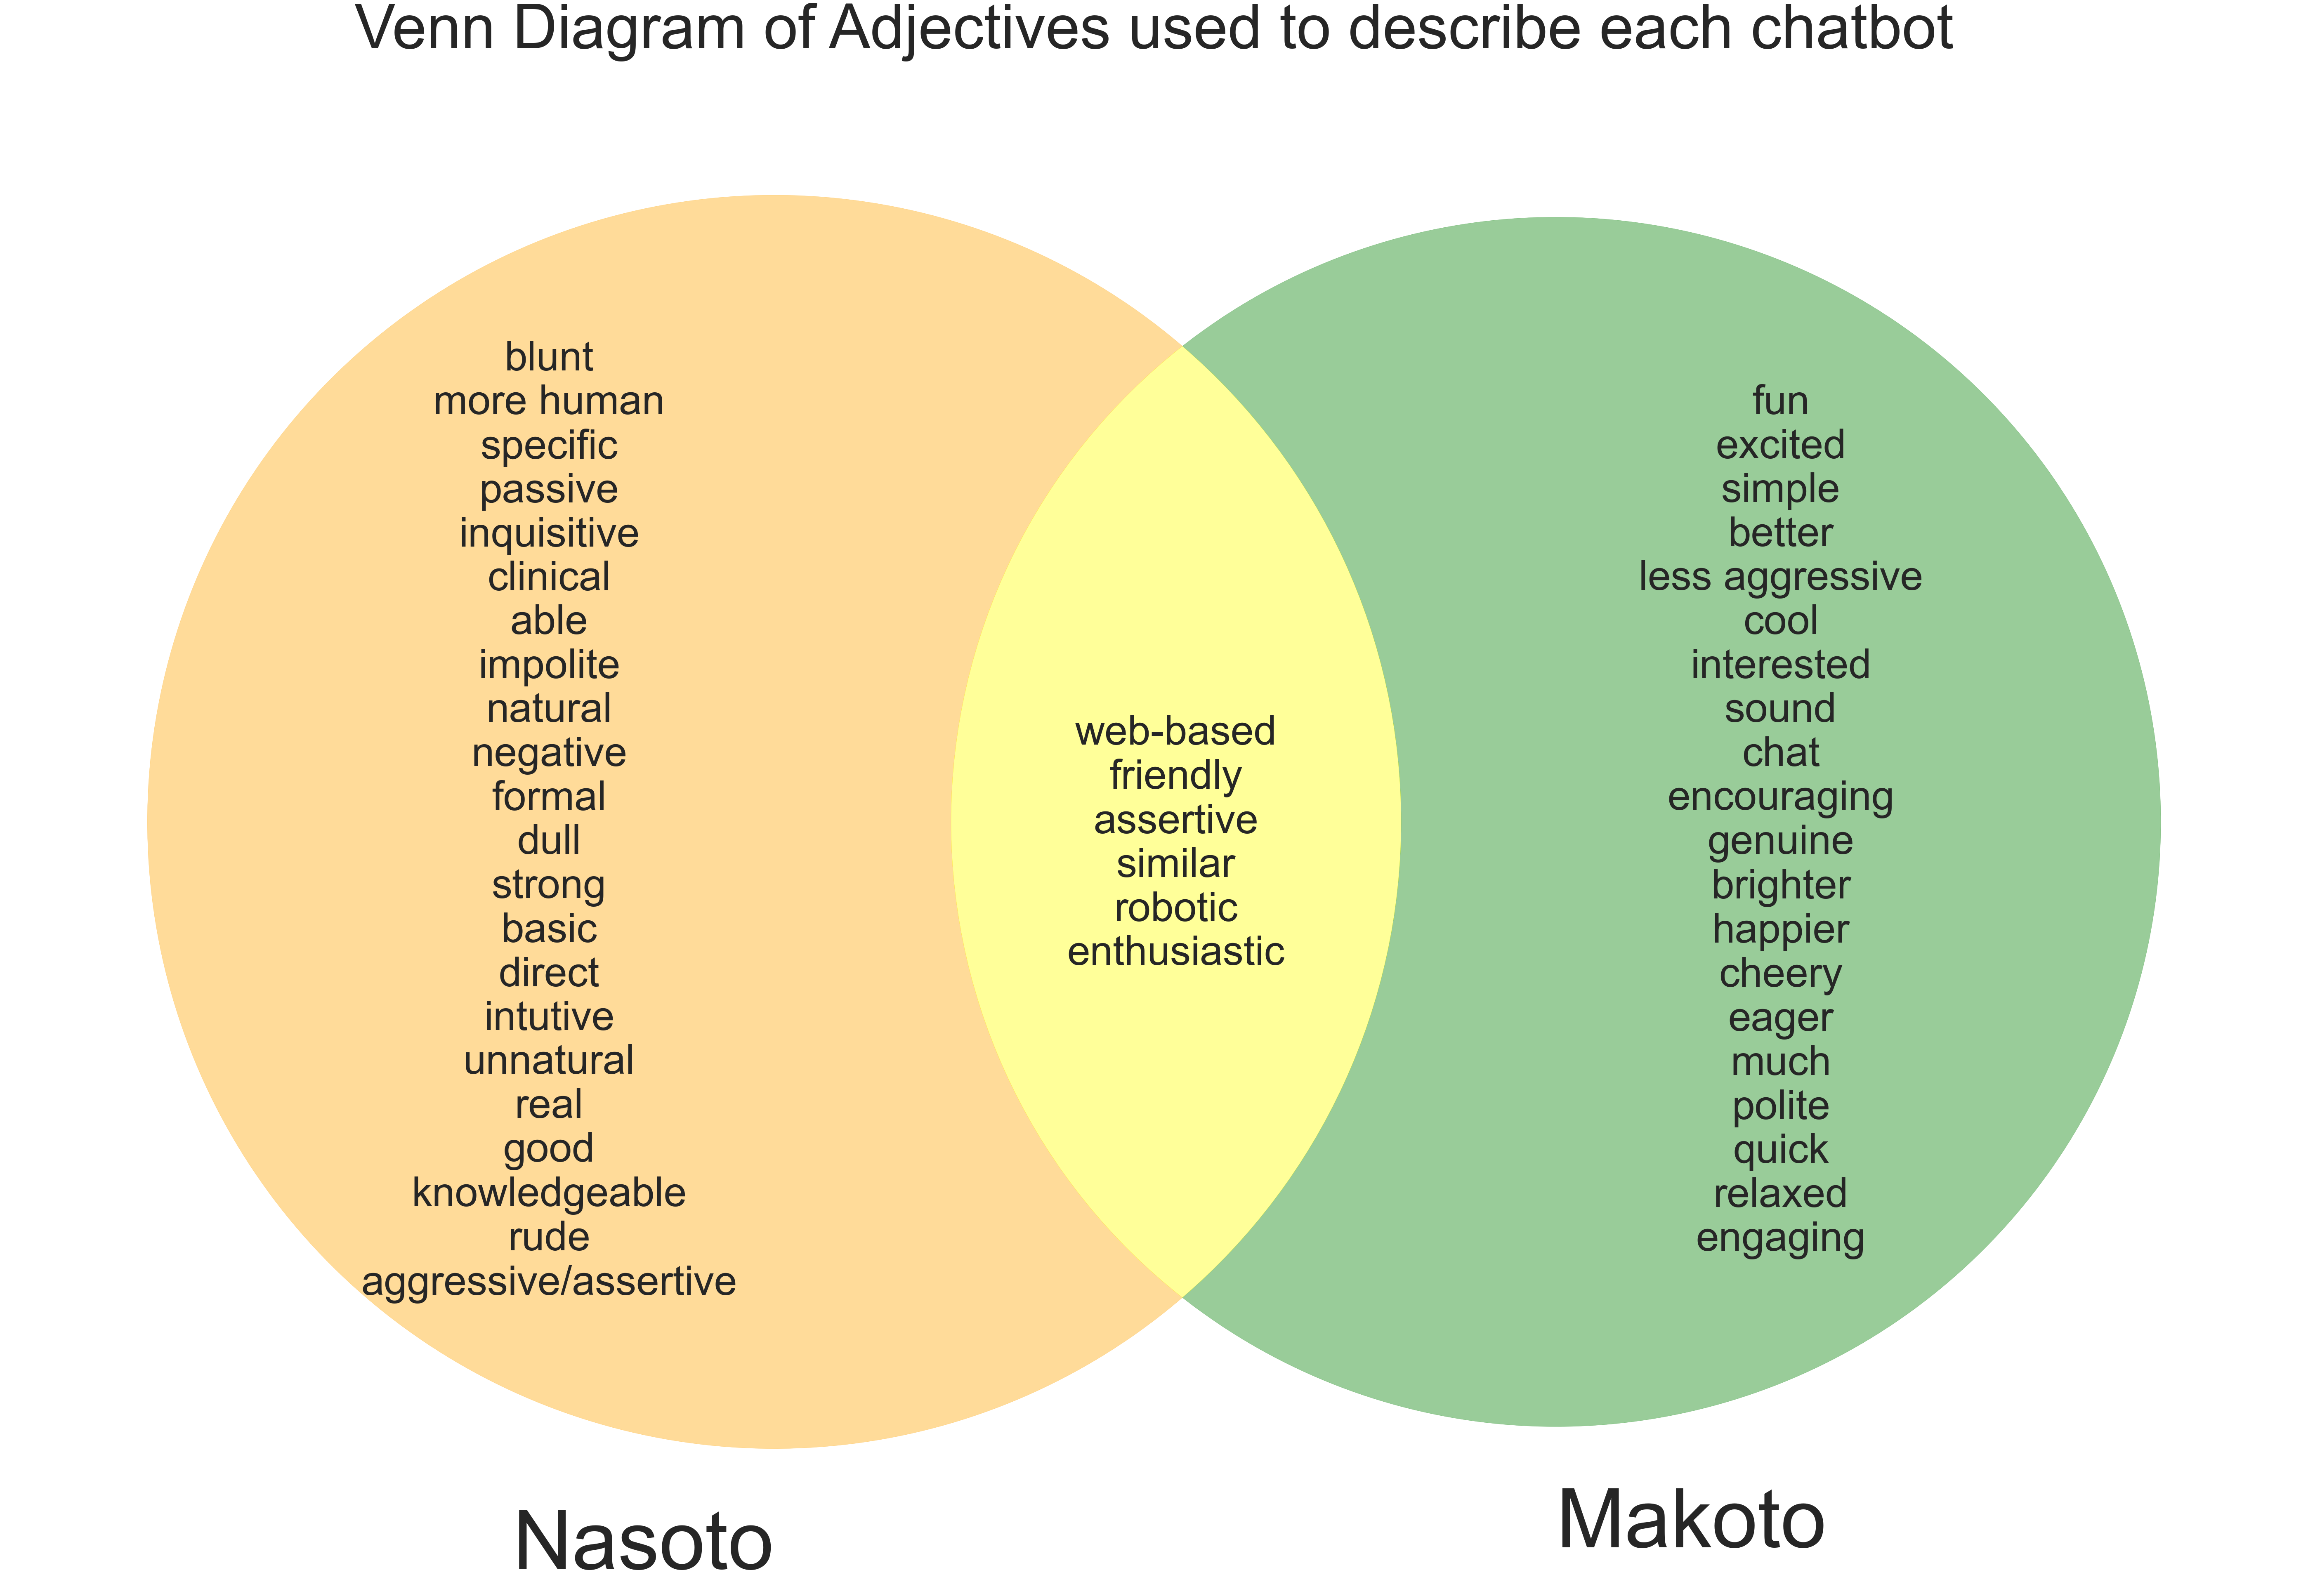

In [55]:
import math, itertools
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
plt.figure(figsize=(100, 110))
plt.title('Venn Diagram of Adjectives used to describe each chatbot').set_fontsize(150)
makotoSet = set(makoto_adj)
nasotoSet = set(nasoto_adj)

s = [nasotoSet, makotoSet]

def gen_index(n):
    x = -1
    while True:       
        while True:
            x = x + 1
            if bin(x).count('1') == n:
                break
        yield x
def make_intersections(sets):
    l = [None] * 2**len(sets)
    for i in range(1, len(sets) + 1):
        ind = gen_index(i)
        for subset in itertools.combinations(sets, i):
            inter = set.intersection(*subset)
            l[next(ind)] = inter
    return l
def bits2indices(b):
    l = []
    if b == 0:
        return l
    for i in reversed(range(0, int(math.log(b, 2)) + 1)):
        if b & (1 << i):
            l.append(i)
    return l
def number2venn_id(x, n_fill):
    id = bin(x)[2:].zfill(n_fill)
    id = id[::-1]
    return id

def sets2dict(s):
    l = make_intersections(s)
    d = {}
    for i in range(1, len(l)):
        d[number2venn_id(i, len(s))] = l[i]
        for j in range(1, len(l)):
            if bin(j).count('1') < bin(i).count('1'):
                l[j] = l[j] - l[i]
                d[number2venn_id(j, len(s))] = l[j] - l[i]
    return d
# Create dictionary from sets
d = sets2dict(s)

h = venn2(s, ('Nasoto', 'Makoto'))
for text in h.set_labels:
    text.set_fontsize(200)
h.get_patch_by_id('01').set_color('green')
h.get_patch_by_id('10').set_color('orange')
h.get_patch_by_id('11').set_color('yellow')
for k, v in d.items():
    l = h.get_label_by_id(k)
    if l:
        l.set_text('\n'.join(map(str, v)))
        l.set_fontsize(100)

plt.show()

## Demographic Perception of the Chatbots
Analysis into whether users assigned a gender to the chatbots was completed

In [56]:
    '''
    Function that distinguishs whether a word is an personal pronoun
    using the NLTK library 
    '''
def find_PRP(keyword):
    if (pd.isnull(keyword)):
        return ''
    else:
        tokens = nltk.word_tokenize(keyword.lower())
        tagged = nltk.pos_tag(tokens)
        pronoun = [w for w,t in tagged if ("PRP") in t]
        if len(pronoun) < 1:
            return ''
        else:
            return pronoun[0]

IndentationError: expected an indented block (<ipython-input-56-c20962814880>, line 6)

In [ ]:
# Look at the use of personal pronouns 
df_descriptions = []
# Makoto manually add adjectives
df_descriptions_Makoto = []
df_descriptions_Makoto = (df_merged['Expand on your answer (optional)_x'].apply(find_PRP))
df_descriptions_Makoto = df_descriptions_Makoto.append(df_merged['Describe Makoto'].apply(find_PRP))
df_descriptions_Makoto = df_descriptions_Makoto.append(df_merged['Expand on your answer (optional).1_x'].apply(find_PRP))
df_descriptions_Makoto = df_descriptions_Makoto.append(df_merged['Expand on your answer (optional).2_x'].apply(find_PRP))
df_descriptions = df_descriptions_Makoto.append(df_merged['Did you enjoy your interaction with Makoto?'].apply(find_PRP))

# Nasoto manually add adjectives
df_descriptions_Nasoto = []
df_descriptions_Nasoto = (df_merged['Expand on your answer (optional)_y'].apply(find_PRP))
df_descriptions_Nasoto = df_descriptions_Nasoto.append(df_merged['Describe Nasoto'].apply(find_PRP))
df_descriptions_Nasoto = df_descriptions_Nasoto.append(df_merged['Expand on your answer (optional).1_y'].apply(find_PRP))
df_descriptions_Nasoto = df_descriptions_Nasoto.append(df_merged['Expand on your answer (optional).2_y'].apply(find_PRP))
df_descriptions_Nasoto = df_descriptions_Nasoto.append(df_merged['Did you enjoy your interaction with Nasoto?'].apply(find_PRP))

df_descriptions = (df_merged['Did you notice any differences in your interactions with one chatbot over the other? If so what were they.'].apply(find_PRP))
df_descriptions = df_descriptions.append(df_merged['Which chatbot did you prefer interacting with?'].apply(find_PRP))
df_descriptions = df_descriptions.append(df_merged['Explain why you preferred interacting with this chatbot?'].apply(find_PRP))

In [ ]:
    '''
    Function used to count the frequncey of words used 
    '''
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

### List of personal pronouns used to describe Makoto

In [ ]:
wordListToFreqDict(list(df_descriptions_Makoto))

### List of personal pronouns used to describe Nasoto

In [ ]:
wordListToFreqDict(list(df_descriptions_Nasoto))

## Perception of Nasoto by those who preferred Nasoto

In [ ]:
row_indexes=df_merged[df_merged['Chatbot_binary']==1].index 
for row in row_indexes:
    print(df_merged["Explain why you preferred interacting with this chatbot?"][row])

## Perception of Nasoto by those who preferred Makoto

In [ ]:
row_indexes=df_merged[df_merged['Chatbot_binary']==0].index 
for row in row_indexes:
    print(df_merged["Describe Nasoto"][row])

## Perception of Makoto by those who preferred Nasoto

In [ ]:
row_indexes=df_merged[df_merged['Chatbot_binary']==1].index 
for row in row_indexes:
    print(df_merged["Describe Makoto"][row])

## Perception of Makoto by those who preferred Makoto

In [ ]:
row_indexes=df_merged[df_merged['Chatbot_binary']==0].index 
for row in row_indexes:
    print(df_merged["Explain why you preferred interacting with this chatbot?"][row])

# Further Analysis into the languge used by users

In [ ]:
import array
'''
Function used to tokensize utterances into words
'''
def tokenise(utterance):
    results = []
    for data in utterance:
        for sentence in data:
            token1 = nltk.word_tokenize(sentence)
            normalised_tokens= [token.lower()for token in token1 if token.isalpha()]
            results.append(normalised_tokens)
            
    return(results)  

### Tokenise utterances used in conversation with Makoto

In [ ]:
token_makoto = []
token_makoto = (tokenise(df_merged['Utterance_y']))
token_makoto = list(itertools.chain(*token_makoto)) 

### Tokenise utterances used in conversation with Nasoto

In [ ]:
#Tokenise Nasoto
token_nasoto = []
token_nasoto = tokenise(df_merged['Utterance_x'])
token_nasoto = list(itertools.chain(*token_nasoto))

## Correlation between word count and personality scores

In [ ]:
wordCount = (df_merged['Word_Count_x'] +  df_merged['Word_Count_y'])
chatbot = df_personality['Chatbot_binary']
extraversion_score = df_merged['extraversion_score']
agreeableness_score = df_merged['agreeableness_score']

#pbc 
pbc_extraversion = pointbiserialr(wordCount, extraversion_score)
pbc_agreeableness = pointbiserialr(wordCount, agreeableness_score)
pbc_word = pointbiserialr(chatbot, wordCount)

print("Extraversion - " + str(pbc_extraversion))
print("Agreebleness - " + str(pbc_agreeableness))
print("Word Count - " + str(pbc_word))



## Number of Unique words in conversation with Makoto

In [ ]:
# Number of Unique words Makoto 
print("Makoto total words: " + str(len(token_makoto)))
print("Makoto unique words: " + str(len(set(token_makoto))))
print("Makoto % of words that are unique: " + str(((len(set(token_makoto)))/(len(token_makoto)) )*100) + "%")

## Number of Unique words in conversation with Nasoto

In [ ]:
# Number of Unique words Nasoto 
print("Nasoto total words: " + str(len(token_nasoto)))
print("Nasoto unique words: " + str(len(set(token_nasoto))))
print("Nasoto % of words that are unique: " + str(((len(set(token_nasoto)))/(len(token_nasoto)) )*100) + "%")

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Sentiment Analysis

In [ ]:
'''
Function used to find positive and negative words used in 
conversation with each chatbot
'''
def SentimentAnalysis(tokens):
    sid = SentimentIntensityAnalyzer()
    pos_word_list=[]
    neg_word_list=[]

    for word in tokens:
        if (sid.polarity_scores(word)['compound']) > 0.2:
            pos_word_list.append(word)
        elif (sid.polarity_scores(word)['compound']) <0:
            neg_word_list.append(word)             

    print('Positive :',len(pos_word_list))
    print('Negative :',len(neg_word_list))
    

## Number of positive and negative word used in conversation with Nasoto

In [ ]:
# Nasoto Sentiment analysis 
SentimentAnalysis(token_nasoto)

## Number of positive and negative word used in conversation with Nasoto

In [ ]:
# Makoto Sentiment analysis 
SentimentAnalysis(token_makoto)

In [ ]:
'''
Function used to count the number of words tagged as each part-of-speech
Uses NLTK library
'''
from collections import Counter
def partOfSpeech(tokens):
    tags = nltk.pos_tag(set(tokens))
    countTags = Counter( tag for word,  tag in tags)
    print(countTags)

#### Remove stopwords from tokenised words

In [ ]:
from nltk.corpus import stopwords
filtered_nasoto = [w.lower() for w in token_nasoto if w.lower() not in stopwords.words('english')]
filtered_makoto = [w.lower() for w in token_makoto if w.lower() not in stopwords.words('english')]

## Most Common words used in conversation with Nasoto (including stopwords)

In [ ]:
fdist_nasoto = nltk.FreqDist(token_nasoto)
fdist_nasoto.most_common(10)

## Most Common words used in conversation with Nasoto (excluding stopwords)

In [ ]:
# Look at the most common words after the removal of stop words
fdist_nasoto = nltk.FreqDist(filtered_nasoto)
fdist_nasoto.most_common(10)

## Most Common words used in conversation with Makoto (including stopwords)

In [ ]:
# Look at the most common words 
fdist_makoto = nltk.FreqDist(token_makoto)
fdist_makoto.most_common(10)

## Most Common words used in conversation with Makoto (excluding stopwords)

In [ ]:
fdist_makoto = nltk.FreqDist(filtered_makoto)
fdist_makoto.most_common(10)

## Overview of type of words used in conversation with Nasoto

In [ ]:
print(len(filtered_nasoto))
print(SentimentAnalysis(filtered_nasoto))
# Number of Unique words Nasoto 
print("Nasoto total words: " + str(len(filtered_nasoto)))
print("Nasoto unique words: " + str(len(set(filtered_nasoto))))
print("Nasoto % of words that are unique: " + str(((len(set(filtered_nasoto)))/(len(filtered_nasoto)) )*100) + "%")

## Overview of type of words used in conversation with Makoto

In [ ]:
# Makoto Sentiment analysis 
print(len(filtered_makoto))
print(SentimentAnalysis(filtered_makoto))
print("Nasoto total words: " + str(len(filtered_makoto)))
print("Nasoto unique words: " + str(len(set(filtered_makoto))))
print("Nasoto % of words that are unique: " + str(((len(set(filtered_makoto)))/(len(filtered_makoto)) )*100) + "%")

## Frequencey of parts of speech used in conversation with Nasoto

In [ ]:
#Parts of speech Nasoto
partOfSpeech(filtered_nasoto)

## Frequencey of parts of speech used in conversation with Makoto

In [ ]:
#Parts of speech Makoto
partOfSpeech(filtered_makoto)

## Most Commonly used Bigrams in conversation with Nasoto

In [ ]:
#Bigram Frequency Nasoto
token_pairsNasoto = nltk.bigrams(token_nasoto)
freqNasoto = nltk.FreqDist(token_pairsNasoto)
freqNasoto.most_common(10)
# freqNasoto.plot(10)


## Most Commonly used Bigrams in conversation with Makoto

In [ ]:
#Bigram Frequency Makoto
token_pairsMakoto = nltk.bigrams(token_makoto)
freqMakoto = nltk.FreqDist(token_pairsMakoto)
freqMakoto.most_common(10)

### Tokenise each utteracnes by chatbot and individual user

In [ ]:
'''
Function used tokenise each utterance
Uses NLTK library
'''
def tokeniseDF(utterance):
    results = []
    for data in utterance:
        token1 = nltk.word_tokenize(data)
        normalised_tokens= [token.lower()for token in token1 if token.isalpha()]
        results.append(token1)      
    return list(itertools.chain(*results))

In [ ]:
# Text Analysis DataFrame 
df_textAnalysis =  pd.DataFrame()

In [ ]:
df_textAnalysis['Agreeableness'] =  df_merged['agreeableness_score']
df_textAnalysis['Extraversion'] =  df_merged['extraversion_score']
df_textAnalysis['Utterance_Nasoto'] =  df_merged['Utterance_x']
df_textAnalysis['Utterance_Makoto'] =  df_merged['Utterance_y']
df_textAnalysis['TokeniseNasoto'] = ""
df_textAnalysis['TokeniseMakoto'] = ""

for index, row in df_merged.iterrows():
    df_textAnalysis['TokeniseNasoto'][index] = tokeniseDF(df_merged['Utterance_x'][index])
    df_textAnalysis['TokeniseMakoto'][index] = tokeniseDF(df_merged['Utterance_y'][index])


In [ ]:
'''
Function used to count positive words in a list of tokens
'''
def SentimentAnalysisPos(tokens):

    sid = SentimentIntensityAnalyzer()
    pos_word_list=[]
    neg_word_list=[]
    for word in tokens:
        if (sid.polarity_scores(word)['compound']) > 0.2:
            pos_word_list.append(word)
        elif (sid.polarity_scores(word)['compound']) <0:
            neg_word_list.append(word)             
#     print(pos_word_list)
    return len(pos_word_list)
    

In [ ]:
'''
Function used to count negative words in a list of tokens
'''
def SentimentAnalysisNeg(tokens):

    sid = SentimentIntensityAnalyzer()
    pos_word_list=[]
    neg_word_list=[]
    for word in tokens:
        if (sid.polarity_scores(word)['compound']) > 0.2:
            pos_word_list.append(word)
        elif (sid.polarity_scores(word)['compound']) <0:
            neg_word_list.append(word)             
    return len(neg_word_list)
    

In [ ]:
df_textAnalysis['NumberPosTag'] = ""
df_textAnalysis['NumberNegTag'] = ""
for index, row in df_merged.iterrows():
    df_textAnalysis['NumberPosTag'][index] = SentimentAnalysisPos((df_textAnalysis['TokeniseNasoto'][index])) + SentimentAnalysisPos((df_textAnalysis['TokeniseMakoto'][index]))
    df_textAnalysis['NumberNegTag'][index] = SentimentAnalysisNeg((df_textAnalysis['TokeniseNasoto'][index])) + SentimentAnalysisNeg((df_textAnalysis['TokeniseMakoto'][index]))

## Mean of Positive and Negative words used by users

In [ ]:
print("Positive Tag: " + str(np.mean(df_textAnalysis["NumberPosTag"])))
print("Negative Tag: " + str(np.mean(df_textAnalysis["NumberNegTag"] )))

## Variance of Positive and Negative words used by users

In [ ]:
print("Positive Tag: " + str(np.var(df_textAnalysis["NumberPosTag"])))
print("Negative Tag: " + str(np.var(df_textAnalysis["NumberNegTag"] )))

## Correlatation between Positive words used and personality scores of users

In [ ]:
extraversion_score = df_textAnalysis['Extraversion']
agreeableness_score = df_textAnalysis['Agreeableness']
NumberPosTag = df_textAnalysis['NumberPosTag']
#pbc 
pbc_extraversion = pointbiserialr(NumberPosTag, extraversion_score)
pbc_agreeableness = pointbiserialr(NumberPosTag, agreeableness_score)

print(pbc_extraversion)
print(pbc_agreeableness)




## Correlatation between Negative words used and personality scores of users

In [ ]:
extraversion_score = df_textAnalysis['Extraversion']
agreeableness_score = df_textAnalysis['Agreeableness']
NumberNegTag = df_textAnalysis['NumberNegTag']
#pbc 
pbc_extraversion = pointbiserialr(NumberNegTag, extraversion_score)
pbc_agreeableness = pointbiserialr(NumberNegTag, agreeableness_score)

print(pbc_extraversion)
print(pbc_agreeableness)



## Analyse all utterances of a user

In [ ]:
df_textAnalysis['AllUtt'] = ""
for index, row in df_merged.iterrows():
    df_textAnalysis['AllUtt'][index] = (df_textAnalysis['TokeniseNasoto'][index]) + (df_textAnalysis['TokeniseMakoto'][index])

In [ ]:
df_textAnalysis['NumberUnique'] = ""
for index, row in df_merged.iterrows():
    df_textAnalysis['NumberUnique'][index] = len(set(df_textAnalysis['AllUtt'][index]))

## Mean number of Unique words used by the users

In [ ]:
print("Unique Words: " + str(np.mean(df_textAnalysis["NumberUnique"])))

## Correlation between number of unique words used and user's personality scores

In [ ]:
extraversion_score = df_textAnalysis['Extraversion']
agreeableness_score = df_textAnalysis['Agreeableness']
NumberUnique = df_textAnalysis['NumberUnique']
#pbc 
pbc_extraversion = pointbiserialr(NumberUnique, extraversion_score)
pbc_agreeableness = pointbiserialr(NumberUnique, agreeableness_score)

print(pbc_extraversion)
print(pbc_agreeableness)

